# Powered Descent Guidance

### Equations of motion

$$
\vec{s}(t) = \vec{s}_0 + \vec{v}_0t + \frac{1}{2}(\vec{a}_0 + \vec{g})t^2 + \frac{1}{6}\vec{j}_0t^3
$$
$$
\vec{v}(t) = \vec{v}_0 + (\vec{a}_0 + \vec{g})t + \frac{1}{2}\vec{j}_0t^2
$$
$$
\vec{a}(t) = \vec{a}_0 + \vec{g} + \vec{j}_0t
$$

### Definitions
$$
T_{ig}\text{: Time to ignition }
$$
$$
T_{go}\text{: Time to reach target}
$$
$$
t\text{: Elapsed time, naturally } t \in (0, t_{go})
$$
$$
\vec{x}\text{: Target State}
$$
$$
\vec{x}_0\text{: Initial State}
$$

### Solving assuming $\vec{s}(T_{go})=\vec{0}$ and $\vec{v_0}(T_{go}) = \vec{0}$ using target Reference-frame
$$
\vec{a}_0(T_{go}) = - \vec{g} - \frac{4}{T_{go}}\vec{v}_0 - \frac{6}{T_{go}^2}\vec{s}_0
$$
$$
\vec{j}_0(T_{go}) = \frac{6}{T_{go}^2}\vec{v}_0 + \frac{12}{T_{go}^3}\vec{s}_0
$$

### Analysis
$$
\vec{a}_{eng}(t, T_{go}) = \vec{a}_0(T_{go}) + \vec{j}_0(T_{go})t
$$

$$
\lvert \vec{a}_{eng}(t, T_{go}) \rvert = \sqrt{\vec{a}_0^2(T_{go}) + 2t\cdot\vec{a}_0(T_{go})\vec{j}_0(T_{go}) + t^2\cdot\vec{j}_0^2(T_{go})}
$$

<br>

$$
\text{minimize } T_{go} \\
\text{subject to } z(t, T_{go}) \le 0
$$

### $T_{go}$ Bounds ($T_{go}$ search window)

- Lower _(avoid point down)_

$$
\vec{a}_{eng_x}(t, T_{go}) = \vec{a}_0(T_{go}) + \vec{j}_0(T_{go}) \cdot t \quad \forall t \in (0, T_{go})
$$

<br>

$$
\vec{a}_{eng_x}(t=0) \ge 0
$$

$$
T_{go} \ge - \frac{2\vec{V}_{0_x}+\sqrt{4\vec{V}_{0_x}^2-6\vec{G}_x\vec{S}_{0_x}}}{\vec{G}_x}
$$

- Upper _(avoid ground collision)_

$$
T_{go} \le -3 \frac{\vec{S_0}_x}{\vec{V_0}_x}
$$

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

sp.init_printing()

In [2]:
s0, v0, a0, j0 = sp.symbols("s_0 v_0 a_0 j_0")
t, t_go = sp.symbols("t t_go")
g = sp.Symbol("g")
Aeng = sp.Symbol("A_{eng}")

solution = sp.solve([
	sp.Eq(s0 + v0*t_go + (a0 + g)/2 * t_go**2 + j0 * t_go**3 / 6, 0), # s(t=t_go) = 0
	sp.Eq(v0 + (a0 + g) * t_go + j0 * t_go**2 / 2, 0) # v(t=t_go) = 0
], (a0, j0)) # solve for a0, j0

a0 = solution[a0].simplify()
j0 = solution[j0].simplify()

# a_eng = sp.sqrt(a0**2 + 2*t*a0*j0 + t**2 * j0**2).simplify()

# (a0*a0 + 2*t_go*a0*j0 + j0*j0*t_go**2).expand()

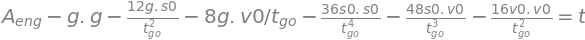

In [3]:
s0s0, s0v0, v0v0, gs0, gv0, gg = sp.symbols("s0.s0 s0.v0 v0.v0 g.s0 g.v0 g.g")

a0a0 = (a0*a0).expand().subs(s0**2, s0s0).subs(s0*v0, s0v0).subs(v0**2, v0v0).subs(g**2, gg).subs(g*s0, gs0).subs(g*v0, gv0)
a0j0 = (a0*j0).expand().subs(g*v0, gv0).subs(s0*s0, s0s0).subs(s0*v0, s0v0).subs(g*s0, gs0).subs(v0*v0, v0v0)
j0j0 = (j0*j0).expand().subs(s0**2, s0s0).subs(s0*v0, s0v0).subs(v0**2, v0v0)

# a0a0 = (a0*a0).expand()
# a0j0 = (a0*j0).expand()
# j0j0 = (j0*j0).expand()

eq = sp.Eq(((-a0j0 + sp.sqrt(a0j0)**2 - a0a0*j0j0 + Aeng * j0j0) / j0j0).simplify(), t)

display(eq)

In [4]:
A, B, C, D, E, F = sp.symbols("A B C D E F") # dot products
 
a0a0 = A + (8*B)/t_go + (12*D+16*C)/t_go**2 + (48*E)/t_go**3 + (36*F)/t_go**4
a0j0 = (-6*B)/t_go**2 + (-12*D - 24*C)/t_go**3 + (-84*E)/t_go**4 + (-72*F)/t_go**5
j0j0 = (144*F)/t_go**4 + (144*E)/t_go**5 + (36*C)/t_go**6

# z(t=0) = 0
# sp.Eq(a0**2 - Aeng**2, 0).expand()

# z(t=t_go) = 0
# sp.Eq(a0a0 + 2*t_go*a0j0 + t_go**2 * j0j0 - Aeng**2, 0).expand()

# solve system
# solution = sp.solve([
# 	sp.Eq(a0a0 - Aeng**2, 0), # z(t=0) = 0
# 	sp.Eq(a0a0 + 2*t_go*a0j0 + t_go**2 * j0j0 - Aeng**2, 0) # z(t=t_go) = 0
# ], t_go)

# sp.solve(sp.Eq(2*t_go*a0j0 + j0j0*t_go**2, 0), t_go)

# -2*(a0j0/j0j0) # resolver numericamente

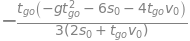

In [5]:
-(2*(a0*j0) / (j0*j0)).simplify()

<hr>

In [ ]:
# particular case
s0 = np.array([3000,1071,2018])
v0 = np.array([-220,130,10])
g = np.array([-9.81, 0.00, 0.00])
Aeng = 34.0

a0 = lambda t_go: s0*(-6/t_go**2) + v0*(-4/t_go) - g
j0 = lambda t_go: s0*(12/t_go**3) + v0*(6/t_go**2)

def z(t, t_go): # |a_eng|(t, t_go)
	_a0 = a0(t_go)
	_j0 = j0(t_go)
	return np.sqrt(_a0.dot(_a0) + 2*t*_a0.dot(_j0) + t**2 * _j0.dot(_j0)) - Aeng

## $T_{go}$ Bounds

In [7]:
# upper limit
t_go_max = 3*np.abs(s0.dot(g)) / (v0.dot(g))

# lower limit
t_go_min = - (2*v0[0] + np.sqrt(4*v0[0]**2 - 6*g[0]*s0[0])) / (g[0])
# t_go_min = - (2*v0.dot(g_axis) + np.sqrt(4*v0.dot(g_axis)**2 - 6*g.dot(g_axis)*s0.dot(g_axis))) / (g.dot(g_axis))
# t_go_min = (-2*v0.dot(g) + np.sqrt(4*v0.dot(g)**2 - 6*g.dot(g)*s0.dot(g))) / (g.dot(g))

print(f"TgoMax: {t_go_max:.2f}")
print(f"TgoMin: {t_go_min:.2f}")

TgoMax: 40.91
TgoMin: 17.17


## $T_{go}(t)$

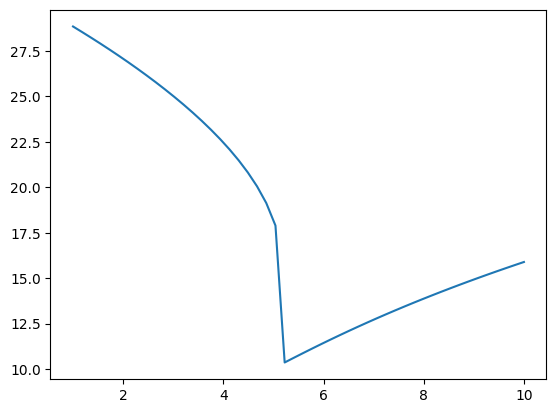

In [8]:
from scipy.optimize import brentq

Tgo = lambda t: brentq(lambda _t_go: z(t, _t_go), 1, 100)

# Tgo(1)
t_arr = np.linspace(1, 10)
plt.plot(t_arr, [Tgo(t) for t in t_arr])

## Minimizing

In [9]:
from scipy.optimize import minimize

def objective(x): return x[0] # Tgo

'''
def constraint(Tgo):
	if Tgo <= 0: return -1.0

	t_vals = np.linspace(0, Tgo, 100)
	z_vals = z(t_vals, Tgo)

	return np.max(z_vals)
'''

def make_constraints(num_points=50):
    t_fracs = np.linspace(0, 1, num_points)
    constraints = []

    for frac in t_fracs:
        def constr(x, frac=frac):
            Tgo = x[0]
            t = frac * Tgo
            return -z(t, Tgo) # z <= 0
        constraints.append({'type': 'ineq', 'fun': constr})

    return constraints

# Otimização com SLSQP
res = minimize(
    fun=objective,
    # x0=[(t_go_min+t_go_max) / 2],
    x0=[t_go_min],
    method='SLSQP',
    bounds=[(t_go_min, t_go_max)],        # Tgo > 0
    constraints=make_constraints(50)
)

res
# make_constraints(50)
#-2(a0 * j0) / (j0 * j0)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 30.438582738778738
       x: [ 3.044e+01]
     nit: 7
     jac: [ 1.000e+00]
    nfev: 14
    njev: 7

## Plotting

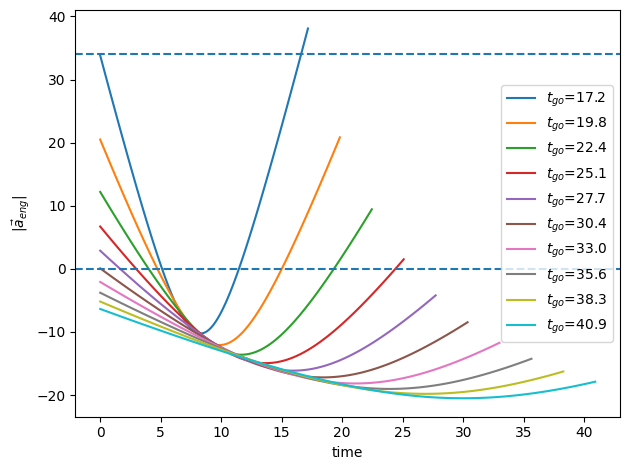

In [24]:
for Tgo in np.linspace(t_go_min, t_go_max, 10):
	t_arr = np.linspace(0, Tgo, 100)
	z_arr = z(t_arr, Tgo)
	plt.plot(t_arr, z_arr, label="$t_{go}$="+f"{Tgo:.1f}")

plt.axhline(Aeng, linestyle="--")
plt.axhline(0, linestyle="--")
plt.xlabel("time")
plt.ylabel(r"$|\vec{a}_{eng}|$")
plt.tight_layout()
plt.legend()
plt.show()

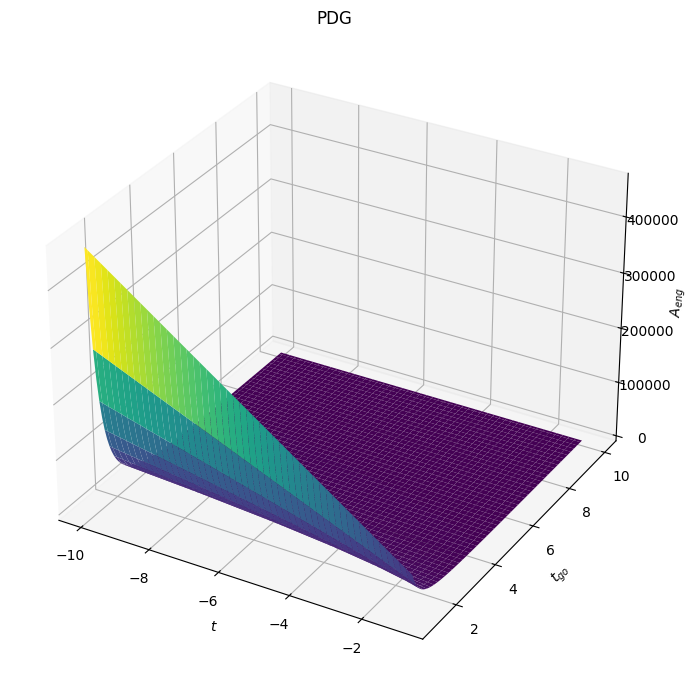

In [25]:
RES = 100
t_vals  = -np.linspace(1, 10, RES)
t_go_vals = np.linspace(1, 10, RES)

T, TGO = np.meshgrid(t_vals, t_go_vals)

Z = np.zeros_like(T)
for i in range(T.shape[0]):
    for j in range(T.shape[1]):
        Z[i, j] = z(T[i, j], TGO[i, j])
        # Z[i, j] = min(z(T[i, j], TGO[i, j]), 10)

# Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T, TGO, Z, cmap='viridis')

ax.set_xlabel('$t$')
ax.set_ylabel('$t_{go}$')
ax.set_zlabel('$A_{eng}$')
ax.set_title('PDG')

# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()